### 데이터 세트: 전복 나이 예측

#### features
- Sex: 성별
> - M/F/I(유아)

- Length: 전복의 긴 반지름 길이
- Diameter: 전복의 짧은 반지름 길이
- Height: 전복의 높이
- Whole_weight: 전복의 총 무게 (껍데기+살+내장)
- Shucked_weight: 살 부분의 무게
- Viscera_weight: 내장 부분의 무게
- Shell_weight: 껍데기 부분의 무게
- Rings: 전복의 나이에서 -1.5 한 수치

In [1]:
import pandas as pd
import numpy as np

# 데이터 세트 가져오기
a_df = pd.read_csv('./datasets/mix_abalone_train.csv')

a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
94787,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
94788,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
94789,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
94790,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
# 데이터 세트 정보 출력
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94792 entries, 0 to 94791
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94792 non-null  object 
 1   Length          94792 non-null  float64
 2   Diameter        94792 non-null  float64
 3   Height          94792 non-null  float64
 4   Whole_weight    94792 non-null  float64
 5   Shucked_weight  94792 non-null  float64
 6   Viscera_weight  94792 non-null  float64
 7   Shell_weight    94792 non-null  float64
 8   Rings           94792 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [3]:
# 중복 검사
a_df.duplicated().sum()

0

In [4]:
# 결측치 검사
a_df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

#### 중간 분석
- 중복 및 결측치 없음

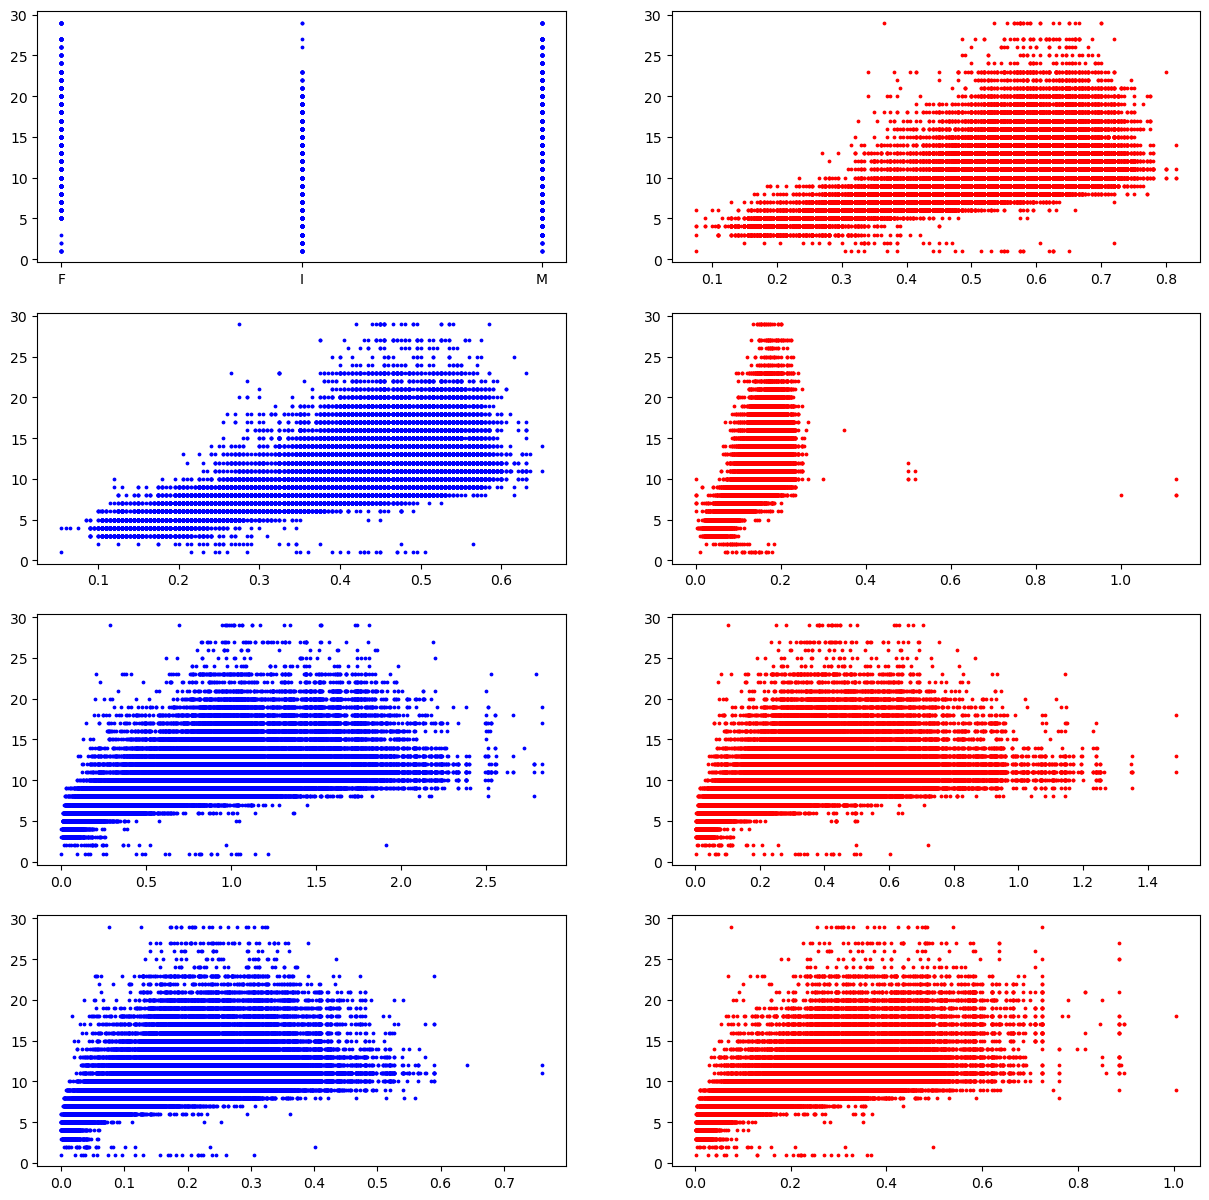

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2, figsize=(15, 15))

ax[0][0].scatter(x='Sex', y='Rings', data=a_df, c='blue', s=3)
ax[0][1].scatter(x='Length', y='Rings', data=a_df, c='red', s=3)

ax[1][0].scatter(x='Diameter', y='Rings', data=a_df, c='blue', s=3)
ax[1][1].scatter(x='Height', y='Rings', data=a_df, c='red', s=3)

ax[2][0].scatter(x='Whole_weight', y='Rings', data=a_df, c='blue', s=3)
ax[2][1].scatter(x='Shucked_weight', y='Rings', data=a_df, c='red', s=3)

ax[3][0].scatter(x='Viscera_weight', y='Rings', data=a_df, c='blue', s=3)
ax[3][1].scatter(x='Shell_weight', y='Rings', data=a_df, c='red', s=3)
plt.show()

#### 중간 분석
- 높이와 성별은 나이와의 상관관계가 상대적으로 낮은 것으로 추정
- 또한 무게를 나타내는 feature들의 시각화 결과가 모두 비슷하게 나옴에 따라,  
  해당 feature들 사이에 다중 공선성이 발생했을 우려가 있음

### 데이터 표준화 후 이상치 제거

In [6]:
# 원본 데이터 세트 복사
pre_a_df = a_df.copy()
pre_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
94787,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
94788,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
94789,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
94790,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
pre_a_df.iloc[:, 1:]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...
94787,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
94788,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
94789,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
94790,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
pre_a_df.columns[1:]

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler

# 범주형 데이터(성별)만 제외한 나머지만 가져와, 표준화 할 데이터 세트를 새로 생성
std = StandardScaler()
result = std.fit_transform(pre_a_df.iloc[:, 1:])
std_pre_a_df = pd.DataFrame(result, columns=pre_a_df.columns[1:])
std_pre_a_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.275535,0.285945,0.375921,-0.041994,-0.063806,-0.231061,0.103586,0.406699
1,0.951741,0.897644,0.245005,0.738663,0.567083,1.051837,0.715963,0.406699
2,-3.020967,-2.976454,-2.896970,-1.676256,-1.637376,-1.647184,-1.695272,-1.166278
3,0.655901,0.744720,0.375921,0.269398,0.165165,0.351177,0.180133,0.092103
4,0.317798,0.234970,-0.147742,-0.019129,0.135935,-0.097837,-0.221740,-0.222492
...,...,...,...,...,...,...,...,...
94787,0.402324,0.489845,0.768668,0.209515,0.138371,0.681770,0.172478,0.406699
94788,0.613638,0.387895,-0.016826,0.381543,0.474520,0.439993,0.260507,0.092103
94789,0.698164,0.744720,1.815993,0.838831,0.895925,1.160390,0.624106,-0.222492
94790,0.909478,0.846670,0.375921,0.661360,0.922719,0.898876,0.532250,0.092103


In [10]:
condition = True

# 반복문으로 각 컬럼에서 -1.96 ~ 1.96 사이의 데이터만 가져오는 조건식 생성
for column in std_pre_a_df.columns:
    condition &= std_pre_a_df[column].between(-1.96, 1.96)

# 위 조건에 맞지 않는 데이터 삭제
std_pre_a_df = std_pre_a_df[condition]
std_pre_a_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.275535,0.285945,0.375921,-0.041994,-0.063806,-0.231061,0.103586,0.406699
1,0.951741,0.897644,0.245005,0.738663,0.567083,1.051837,0.715963,0.406699
3,0.655901,0.744720,0.375921,0.269398,0.165165,0.351177,0.180133,0.092103
4,0.317798,0.234970,-0.147742,-0.019129,0.135935,-0.097837,-0.221740,-0.222492
5,0.782690,0.795695,0.899584,0.893270,0.934899,1.416970,0.627934,0.092103
...,...,...,...,...,...,...,...,...
94786,0.360061,0.285945,0.506837,0.167053,0.284523,0.020584,0.019384,-0.537087
94787,0.402324,0.489845,0.768668,0.209515,0.138371,0.681770,0.172478,0.406699
94788,0.613638,0.387895,-0.016826,0.381543,0.474520,0.439993,0.260507,0.092103
94789,0.698164,0.744720,1.815993,0.838831,0.895925,1.160390,0.624106,-0.222492


In [11]:
# pre_a_df에서 이상치가 없는 인덱스만 유지하고, 인덱스 초기화
pre_a_df = pre_a_df.iloc[std_pre_a_df.index].reset_index(drop=True)
pre_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
3,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
4,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
...,...,...,...,...,...,...,...,...,...
78433,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
78434,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
78435,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
78436,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

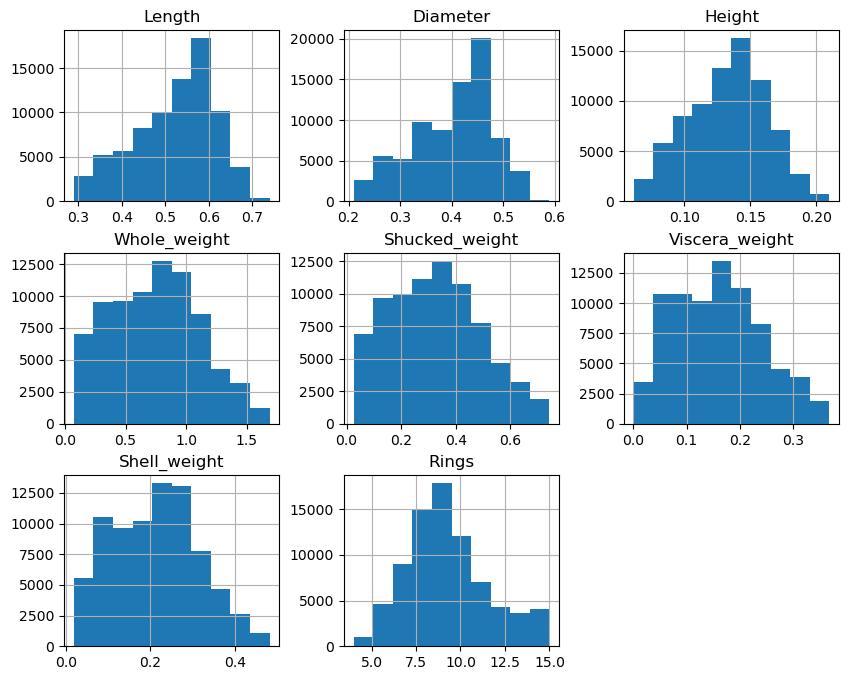

In [12]:
# 각 컬럼의 데이터 분포 출력
pre_a_df.hist(figsize=(10, 8))

### 성별 feature 인코딩
- 인코딩 전, 각 성별의 데이터 분포를 균일하게 조정
- 성별 사이에는 순서가 없음
- 따라서 우선 원핫 인코딩부터 실행해보고, 평가 지표에 문제 발생 시  
  I(유아) 데이터 지우고 레이블 인코딩으로 다시 시도

In [13]:
pre_a_df.Sex.value_counts()

Sex
I    28953
M    27064
F    22421
Name: count, dtype: int64

#### 중간 분석
- 각 데이터 분포의 편차가 크지 않음
- 이 경우 SMOTE를 통한 오버 샘플링을 생각해볼 수 있지만, SMOTE는 데이터 세트 분할 과정에서 실행하기 때문에  
  원핫 인코딩과 병행하면 이후 과정에 어려움을 겪을 수 있다고 판단
- 따라서 이번 실습에서는 언더 샘플링으로 진행

In [14]:
# 데이터가 가장 적은 F(암컷 전복)를 기준으로 언더 샘플링
infant_abalones = pre_a_df[pre_a_df.Sex == 'I'].sample(22421, random_state=124)
male_abalones = pre_a_df[pre_a_df.Sex == 'M'].sample(22421, random_state=124)
female_abalones = pre_a_df[pre_a_df.Sex == 'F']

pre_a_df = pd.concat([infant_abalones, male_abalones, female_abalones]).reset_index(drop=True)
pre_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,I,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,I,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,I,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,I,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
67258,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [15]:
# 데이터 세트 복사
first_a_df = pre_a_df.copy()
first_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,I,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,I,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,I,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,I,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
67258,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [16]:
from sklearn.preprocessing import OneHotEncoder

# 성별 feature 원핫 인코딩
one_hot_encoder = OneHotEncoder(sparse_output=False)

result = one_hot_encoder.fit_transform(first_a_df[['Sex']])

one_hot_encoder.categories_

[array(['F', 'I', 'M'], dtype=object)]

In [17]:
# 원핫 인코딩 된 데이터를 원볻 데이터 세트에 병합
first_a_df = pd.concat([first_a_df,
                     pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)],
                     axis=1)

first_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,"(F,)","(I,)","(M,)"
0,I,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7,0,1,0
1,I,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9,0,1,0
2,I,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8,0,1,0
3,I,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7,0,1,0
4,I,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67258,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11,1,0,0
67259,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11,1,0,0
67260,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8,1,0,0
67261,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0


In [18]:
# 성별 feature 제거
first_a_df = first_a_df.drop(labels=['Sex'], axis=1)
first_a_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,"(F,)","(I,)","(M,)"
0,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7,0,1,0
1,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9,0,1,0
2,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8,0,1,0
3,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7,0,1,0
4,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
67258,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11,1,0,0
67259,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11,1,0,0
67260,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8,1,0,0
67261,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0


In [19]:
# 컬럼명 변경
first_a_df.columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
                   'Viscera_weight', 'Shell_weight', 'Rings', 'Female', 'Infant', 'Male']

first_a_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Female,Infant,Male
0,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7,0,1,0
1,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9,0,1,0
2,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8,0,1,0
3,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7,0,1,0
4,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
67258,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11,1,0,0
67259,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11,1,0,0
67260,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8,1,0,0
67261,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0


In [20]:
# 컬럼 순서 재배치
columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
           'Viscera_weight', 'Shell_weight', 'Male', 'Female', 'Infant', 'Rings']

first_a_df = first_a_df.loc[:, columns]
first_a_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Male,Female,Infant,Rings
0,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,0,0,1,7
1,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,0,0,1,9
2,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,0,0,1,8
3,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,0,0,1,7
4,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...
67258,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,0,1,0,11
67259,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,0,1,0,11
67260,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,0,1,0,8
67261,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,1,0,11


### OLS 평가

In [21]:
from statsmodels.api import OLS

features, targets = first_a_df.iloc[:, :-1], first_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8654.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        15:43:25   Log-Likelihood:            -1.2084e+05
No. Observations:               67263   AIC:                         2.417e+05
Df Residuals:                   67253   BIC:                         2.418e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length            -0.9807      0.369     -2.

#### OLS 출력 결과
- R2 점수가 다소 낮게 측정됨
- coef를 보아, 전복의 높이와 껍데기 무게, 살 무게(음의 상관관계)를 특히 중요하게 취급한 것을 알 수 있음
- 또한 Kurtosis의 값은 target의 분포에 이상이 있음을 시사함

<Axes: >

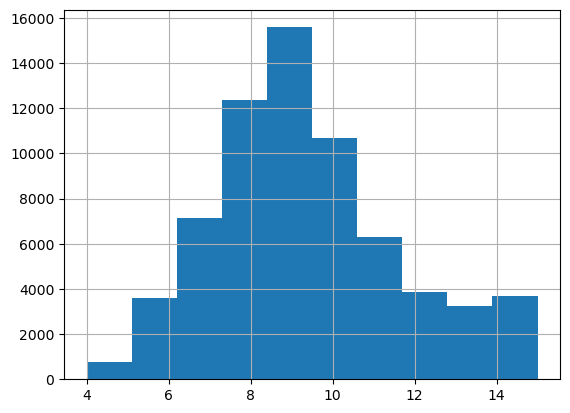

In [22]:
# 현재 target의 분포 출력
first_a_df.Rings.hist()

<Axes: >

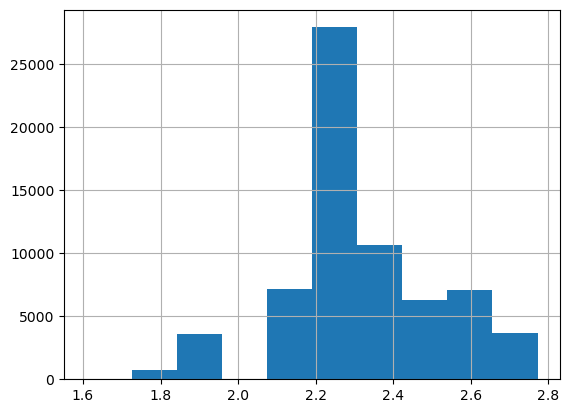

In [23]:
# 로그 적용 후의 target 분포 출력
np.log1p(first_a_df.Rings).hist()

<Axes: >

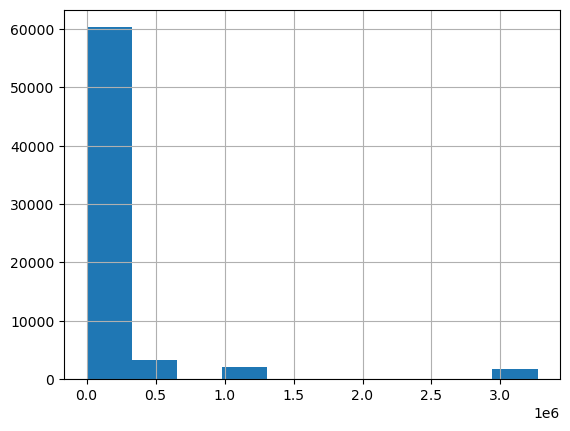

In [24]:
# 지수 적용 후의 target 분포 출력
np.expm1(first_a_df.Rings).hist()

#### 중간 분석
- target의 분포가 첨도는 높지 않지만, 표준 정규 분포에 비해 높은 쪽 값의 비중이 늘어난 형태를 보임
- fit 이후 점수가 나오지 않는다면, 다음 사이클에서는 인코딩 전 이상치 제거부터 할 것 (불린 인덱싱)

### VIF Score 출력

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [26]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,36.087115,Length
1,38.012717,Diameter
2,6.830980,Height
3,69.941914,Whole_weight
4,21.070805,Shucked_weight
5,17.036851,Viscera_weight
6,18.468628,Shell_weight
7,64.519465,Male
8,64.942069,Female
9,59.224926,Infant


#### VIF Score 출력 결과
- 높이를 제외한 모든 feature에서 이상 발생
- feature 간 상관관계와 다중 공선성 발생 여부를 확인할 필요가 있음

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# target과 feature들 사이의 상관관계 출력
first_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Shell_weight      0.652681
Height            0.624410
Diameter          0.597412
Length            0.582424
Whole_weight      0.582056
Viscera_weight    0.565577
Shucked_weight    0.482898
Female            0.292684
Male              0.215656
Infant           -0.508339
Name: Rings, dtype: float64

<Axes: >

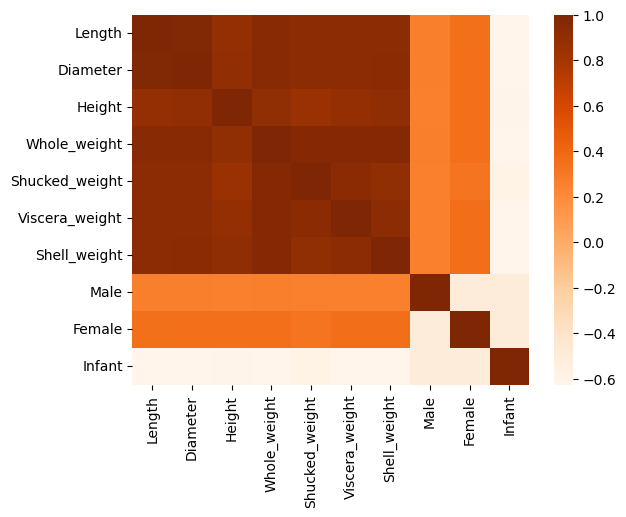

In [28]:
# feature들 간의 상관관게 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [29]:
# feature들 간의 상관관게 출력
features.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Male,Female,Infant
Length,1.000000,0.984782,0.896315,0.952230,0.928915,0.924369,0.931332,0.265863,0.349991,-0.615855
Diameter,0.984782,1.000000,0.901407,0.953004,0.925325,0.924597,0.938048,0.269212,0.355963,-0.625175
Height,0.896315,0.901407,1.000000,0.905960,0.861266,0.886175,0.911689,0.255223,0.354537,-0.609761
Whole_weight,0.952230,0.953004,0.905960,1.000000,0.970706,0.969812,0.962628,0.266425,0.358224,-0.624649
Shucked_weight,0.928915,0.925325,0.861266,0.970706,1.000000,0.938986,0.909403,0.257478,0.329750,-0.587228
Viscera_weight,0.924369,0.924597,0.886175,0.969812,0.938986,1.000000,0.932641,0.256669,0.359741,-0.616410
Shell_weight,0.931332,0.938048,0.911689,0.962628,0.909403,0.932641,1.000000,0.260519,0.364384,-0.624903
Male,0.265863,0.269212,0.255223,0.266425,0.257478,0.256669,0.260519,1.000000,-0.500000,-0.500000
Female,0.349991,0.355963,0.354537,0.358224,0.329750,0.359741,0.364384,-0.500000,1.000000,-0.500000
Infant,-0.615855,-0.625175,-0.609761,-0.624649,-0.587228,-0.616410,-0.624903,-0.500000,-0.500000,1.000000


#### 상관관계 시각화 결과
- feature들 간 대부분의 상관관게가 매우 높음
- 이는 길이와 무게 feature들 사이에, 길이 / 무게 feature들 간에는 당연히 정비례에 근접하는 관계가 존재하기 때문
- 따라서 다음 사이클에서는 길이 / 무게 feature 각각에서 target과의 상관관계가 가장 높은 feature 하나만 남겨보고,  
  이 때도 이슈가 생긴다면 그 중 하나만 남겨서 다시 평가해볼 것

### 선형 회귀 모델로 학습

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = first_a_df.iloc[:, :-1], first_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [32]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.1282, RMSE: 1.4588, MSLE: 0.0176, RMSLE: 0.1326, R2: 0.5377


#### 선형 회귀 모델 학습 결과
- OLS 평가와 R2 Score가 비슷하게 측정됨

### 다항 회귀 모델로 학습

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 회귀: degree는 차수를 의미함
poly_features = PolynomialFeatures(degree=3).fit_transform(features)
poly_features

array([[1.   , 0.405, 0.3  , ..., 0.   , 0.   , 1.   ],
       [1.   , 0.52 , 0.4  , ..., 0.   , 0.   , 1.   ],
       [1.   , 0.375, 0.28 , ..., 0.   , 0.   , 1.   ],
       ...,
       [1.   , 0.515, 0.4  , ..., 0.   , 0.   , 0.   ],
       [1.   , 0.565, 0.45 , ..., 0.   , 0.   , 0.   ],
       [1.   , 0.625, 0.485, ..., 0.   , 0.   , 0.   ]])

In [34]:
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [35]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.9425, RMSE: 1.3937, MSLE: 0.0161, RMSLE: 0.1268, R2: 0.5781


#### 다항 회귀 모델 학습 결과
- 회귀선의 차수가 3일 때 가장 높은 R2 Score를 기록했으며,  
  이는 앞선 OLS나 선형 회귀 모델보다 높음
- 따라서 현재의 데이터는 비선형의 성격을 띄고 있다고 볼 수 있음

### 각종 회귀 모델로 학습

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = first_a_df.iloc[:, :-1], first_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀모델 선언
# 주의: poly랑 병행하지 말 것
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 반복문으로 fit하기 위해 list 안에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 3.8896, RMSE: 1.9722, MSLE: 0.0322, RMSLE: 0.1794, R2: 0.1552
RandomForestRegressor
MSE: 1.9445, RMSE: 1.3944, MSLE: 0.0164, RMSLE: 0.1279, R2: 0.5776
GradientBoostingRegressor
MSE: 1.9268, RMSE: 1.3881, MSLE: 0.0159, RMSLE: 0.1262, R2: 0.5815
XGBRegressor
MSE: 1.8784, RMSE: 1.3706, MSLE: 0.0156, RMSLE: 0.1250, R2: 0.5920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 53810, number of used features: 10
[LightGBM] [Info] Start training from score 9.408883
LGBMRegressor
MSE: 1.8593, RMSE: 1.3636, MSLE: 0.0154, RMSLE: 0.1242, R2: 0.5961


#### 각종 회귀 모델 학습 결과
- LightGBM 회귀 모델이 오차(RMSE)가 가장 적었으며, R2 Score 역시 가장 우수한 결과를 보임

### Random Forest 회귀 모델로 교차 검증

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = first_a_df.iloc[:, :-1], first_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [16, 18, 20],
              'min_samples_split': [100, 200, 300],
              'n_estimators': [10, 30, 50]}

kfold = KFold(n_splits=3, random_state=124, shuffle=True)

# scoring='neg_mean_squared_error': MSE가 낮은 순으로 평가
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)

# cv에 시드값이 고정된 KFold 객체를 전달
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [16, 18, 20],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [38]:
# 각 하이퍼 파라미터 조합 별 평가 점수를 데이터프레임 형식으로 만들어 출력
rfr_result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfr_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-1.946140,13
1,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-1.926193,5
2,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-1.922149,2
3,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-1.951679,17
4,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-1.937982,12
5,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-1.935377,9
6,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-1.965516,27
7,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-1.955377,24
8,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-1.954267,21
9,"{'max_depth': 18, 'min_samples_split': 100, 'n...",-1.946205,14


In [39]:
# 가장 높은 평가 점수를 받은 하이퍼 파라미터 조합들 출력
for params in rfr_result_df[rfr_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 20, 'min_samples_split': 100, 'n_estimators': 50}


#### Random Forest 회귀 모델 교차 검증 결과
- max_depth가 20, min_samples_split이 100, n_estimators가 50일 때 가장 좋은 평가 점수를 기록함

### Random Forest 회귀 모델 하이퍼 파라미터 튜닝 후 학습

In [40]:
# 최적의 하이퍼 파라미터로 튜닝
features, targets = first_a_df.iloc[:, :-1], first_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124, max_depth=20, min_samples_split=100, n_estimators=50)

rf_r.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=50,
                      random_state=124)

In [41]:
# 테스트 데이터 예측 후 평가
prediction = rf_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.8791, RMSE: 1.3708, MSLE: 0.0156, RMSLE: 0.1251, R2: 0.5918


#### 하이퍼 파라미터 튜닝 결과
- 튜닝 이전보다 더 나은 결과를 보여줬지만, R2와 오차는 여전히 놓지 않은 평가를 기록함
- 이는 전처리 과정에서 feature들 사이의 상관관계가 매우 높았기 때문으로 추정

### 1st Cycle
- feature 사이의 상관관계가 매우 높았기에, 길이 / 무게를 나타내는 feature들 중  
  target과의 상관간계가 가장 높은 feature를 각각 하나씩만 남겨서 테스트
> - OLS의 가중치(coef)와 VIF Score를 기준으로 판단했을 때,  
길이는 Height, 무게는 Shell Weight를 남기는 것이 적합하다고 판단
> - Chat GPT 질문 결과, 실제로도 전복이 나이를 먹을수록 전체 무게에서 껍데기의 비중이 늘어난다고 함
> <img src='./images/about_abalone01.png' style='margin: 20px 0'>

### 2nd Cycle - 데이터 전처리
- 위에서 언급한 2가지와 성별 feature를 제외한 나머지 feature 제거

In [42]:
drop_columns = ['Length', 'Diameter', 'Whole_weight', 'Shucked_weight', 'Viscera_weight']

# 1st Cycle 때의 데이터 세트에서 위의 feature들만 제거한 새로운 데이터 세트 생성
second_a_df = first_a_df.drop(labels=drop_columns, axis=1)
second_a_df

,Height,Shell_weight,Male,Female,Infant,Rings
0,0.090,0.0900,0,0,1,7
1,0.140,0.1740,0,0,1,9
2,0.095,0.0605,0,0,1,8
3,0.090,0.0850,0,0,1,7
4,0.125,0.1235,0,0,1,8
...,...,...,...,...,...,...
67258,0.165,0.3000,0,1,0,11
67259,0.170,0.2845,0,1,0,11
67260,0.125,0.1765,0,1,0,8
67261,0.165,0.2490,0,1,0,11


### OLS 평가

In [43]:
from statsmodels.api import OLS

features, targets = second_a_df.iloc[:, :-1], second_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.353e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        15:48:30   Log-Likelihood:            -1.2686e+05
No. Observations:               67263   AIC:                         2.537e+05
Df Residuals:                   67258   BIC:                         2.538e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Height           9.9254      0.511     19.406   

#### OLS 출력 결과
- R2 점수가 1st Cycle보다 감소함

### VIF Score 출력

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [45]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,6.018086,Height
1,6.206837,Shell_weight
2,19.898009,Male
3,20.459404,Female
4,15.826212,Infant


#### VIF Score 출력 결과
- 원핫 인코딩을 실행한 성별 feature들의 VIF Score가 매우 높게 측정됨
- 다음 사이클에서는 성별 feature의 인코딩 방식을 레이블 인코딩으로 바꿔볼 것

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# target과 feature들 사이의 상관관계 출력
second_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Shell_weight    0.652681
Height          0.624410
Female          0.292684
Male            0.215656
Infant         -0.508339
Name: Rings, dtype: float64

<Axes: >

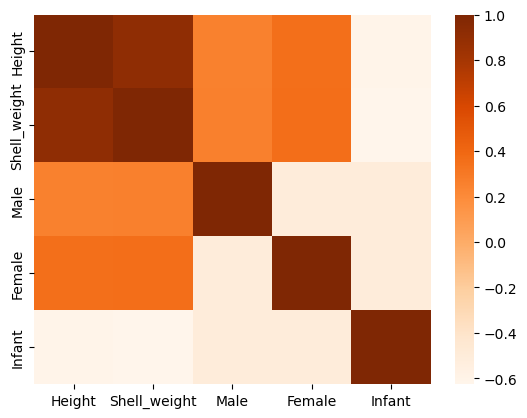

In [47]:
# feature들 간의 상관관게 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [48]:
# feature들 간의 상관관게 출력
features.corr()

,Height,Shell_weight,Male,Female,Infant
Height,1.000000,0.911689,0.255223,0.354537,-0.609761
Shell_weight,0.911689,1.000000,0.260519,0.364384,-0.624903
Male,0.255223,0.260519,1.000000,-0.500000,-0.500000
Female,0.354537,0.364384,-0.500000,1.000000,-0.500000
Infant,-0.609761,-0.624903,-0.500000,-0.500000,1.000000


#### 상관관계 시각화 결과
- Height과 Shell_weight 사이의 상관관계가 매우 높음
- 이후 사이클에서 둘 중 하나를 제거하는 것도 고려해볼 것

### 선형 회귀 모델로 학습

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = second_a_df.iloc[:, :-1], second_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [51]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.5441, RMSE: 1.5950, MSLE: 0.0205, RMSLE: 0.1433, R2: 0.4474


#### 선형 회귀 모델 학습 결과
- OLS와 마찬가지로 1st Cycle에 비해 R2 Score가 감소하고, 편차가 증가함
- 이는 모델의 성능이 떨어졌거나, 이번 모델의 회귀선이 1st Cycle에 비해 비선형의 성격이 강해졌다고 볼 수 있음

### 다항 회귀 모델로 학습

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 회귀: degree는 차수를 의미함
poly_features = PolynomialFeatures(degree=5).fit_transform(features)
poly_features

array([[1.    , 0.09  , 0.09  , ..., 0.    , 0.    , 1.    ],
       [1.    , 0.14  , 0.174 , ..., 0.    , 0.    , 1.    ],
       [1.    , 0.095 , 0.0605, ..., 0.    , 0.    , 1.    ],
       ...,
       [1.    , 0.125 , 0.1765, ..., 0.    , 0.    , 0.    ],
       [1.    , 0.165 , 0.249 , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.15  , 0.296 , ..., 0.    , 0.    , 0.    ]])

In [53]:
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [54]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.4529, RMSE: 1.5662, MSLE: 0.0197, RMSLE: 0.1403, R2: 0.4672


#### 다항 회귀 모델 학습 결과
- 회귀선의 차수가 5일 때 가장 높은 평가를 기록함
- 다만, 이 때의 점수는 1st Cycle에서의 다항 회귀 때보다 낮게 측정됨

### 각종 회귀 모델로 학습

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = second_a_df.iloc[:, :-1], second_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀모델 선언
# 주의: poly랑 병행하지 말 것
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 반복문으로 fit하기 위해 list 안에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.7010, RMSE: 1.6435, MSLE: 0.0220, RMSLE: 0.1484, R2: 0.4133
RandomForestRegressor
MSE: 2.5155, RMSE: 1.5860, MSLE: 0.0205, RMSLE: 0.1433, R2: 0.4536
GradientBoostingRegressor
MSE: 2.3758, RMSE: 1.5414, MSLE: 0.0191, RMSLE: 0.1383, R2: 0.4840
XGBRegressor
MSE: 2.3533, RMSE: 1.5341, MSLE: 0.0190, RMSLE: 0.1378, R2: 0.4888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 53810, number of used features: 5
[LightGBM] [Info] Start training from score 9.408883
LGBMRegressor
MSE: 2.2967, RMSE: 1.5155, MSLE: 0.0185, RMSLE: 0.1362, R2: 0.5011


#### 각종 회귀 모델 학습 결과
- LightGBM 회귀 모델이 오차(RMSE)가 가장 적었으며, R2 Score 역시 가장 우수한 결과를 보임
- 다만, 이번에도 1st Cycle보다 전반적으로 낮은 평가를 기록함

### Random Forest 회귀 모델로 교차 검증

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = second_a_df.iloc[:, :-1], second_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [16, 18, 20],
              'min_samples_split': [100, 200, 300],
              'n_estimators': [10, 30, 50]}

kfold = KFold(n_splits=3, random_state=124, shuffle=True)

# scoring='neg_mean_squared_error': MSE가 낮은 순으로 평가
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)

# cv에 시드값이 고정된 KFold 객체를 전달
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [16, 18, 20],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [57]:
# 각 하이퍼 파라미터 조합 별 평가 점수를 데이터프레임 형식으로 만들어 출력
rfr_result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfr_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.325711,18
1,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.318710,10
2,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.317016,3
3,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.324984,16
4,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.319434,12
5,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.318800,11
6,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.334514,27
7,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.329874,24
8,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.329154,23
9,"{'max_depth': 18, 'min_samples_split': 100, 'n...",-2.325057,17


In [58]:
# 가장 높은 평가 점수를 받은 하이퍼 파라미터 조합들 출력
for params in rfr_result_df[rfr_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 20, 'min_samples_split': 100, 'n_estimators': 50}


#### Random Forest 회귀 모델 교차 검증 결과
- max_depth가 20, min_samples_split이 100, n_estimators가 50일 때 가장 좋은 평가 점수를 기록함

### Random Forest 회귀 모델 하이퍼 파라미터 튜닝 후 학습

In [59]:
# 최적의 하이퍼 파라미터로 튜닝
features, targets = second_a_df.iloc[:, :-1], second_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124, max_depth=20, min_samples_split=100, n_estimators=50)

rf_r.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=50,
                      random_state=124)

In [60]:
# 테스트 데이터 예측 후 평가
prediction = rf_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.2897, RMSE: 1.5132, MSLE: 0.0186, RMSLE: 0.1362, R2: 0.5027


#### 하이퍼 파라미터 튜닝 결과
- 전반적으로 1st Cycle보다 낮은 평가를 기록함

### 2nd Cycle
- 상관관계가 높은 feature들을 제거했지만, 모델의 평가 점수는 1st Cycle보다 오히려 감소함
- 이는 제거한 feature들 중 예측에 매우 중요한 feature가 있었거나,  
  성별 feature의 인코딩 방식이 잘못되어 생긴 문제로 추정
- 다음 Cycle에서는 일단 성별의 인코딩 방식만 바꿔보는 것으로 결정

### 3rd Cycle - 데이터 전처리
- pre_a_df에서 2nd Cycle 때와 같은 feature 제거
- 단, 성별 feature의 인코딩 방식을 레이블 인코딩으로 변경하고 평가

In [61]:
drop_columns = ['Length', 'Diameter', 'Whole_weight', 'Shucked_weight', 'Viscera_weight']

# pre_a_df에서 위의 feature들만 제거한 새로운 데이터 세트 생성
third_a_df = pre_a_df.drop(labels=drop_columns, axis=1)
third_a_df

,Sex,Height,Shell_weight,Rings
0,I,0.090,0.0900,7
1,I,0.140,0.1740,9
2,I,0.095,0.0605,8
3,I,0.090,0.0850,7
4,I,0.125,0.1235,8
...,...,...,...,...
67258,F,0.165,0.3000,11
67259,F,0.170,0.2845,11
67260,F,0.125,0.1765,8
67261,F,0.165,0.2490,11


In [62]:
# 성별 feature에 들어있는 문자열 값에 따라 서로 다른 수로 바꿔주는 함수 - 일종의 레이블 인코딩
# M: 0, F: 1, I: 2
def gender_changer(gender):
    if gender == 'M':
        return 0
    if gender == 'F':
        return 1
    return 2

In [63]:
# 성별 feature에 위의 함수 적용
third_a_df['Sex'] = third_a_df['Sex'].apply(gender_changer)
third_a_df

,Sex,Height,Shell_weight,Rings
0,2,0.090,0.0900,7
1,2,0.140,0.1740,9
2,2,0.095,0.0605,8
3,2,0.090,0.0850,7
4,2,0.125,0.1235,8
...,...,...,...,...
67258,1,0.165,0.3000,11
67259,1,0.170,0.2845,11
67260,1,0.125,0.1765,8
67261,1,0.165,0.2490,11


### OLS 평가

In [64]:
from statsmodels.api import OLS

features, targets = third_a_df.iloc[:, :-1], third_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          6.285e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        15:49:52   Log-Likelihood:                     -1.3463e+05
No. Observations:               67263   AIC:                                  2.693e+05
Df Residuals:                   67260   BIC:                                  2.693e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#### OLS 출력 결과
- 2nd Cycle에 비해 R2 점수가 크게 개선됨
- 다만, Height에 매우 높은 가중치가 부여되어 있음

### VIF Score 출력

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [66]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,2.761480,Sex
1,29.822929,Height
2,23.034113,Shell_weight


#### VIF Score 출력 결과
- Height와 Shell_weight의 VIF Score가 매우 높게 측정됨
- 위의 두 feature들 중 하나를 제거하면 더 나은 결과를 얻을 수 있을 것으로 추정

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# target과 feature들 사이의 상관관계 출력
third_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Shell_weight    0.652681
Height          0.624410
Sex            -0.417999
Name: Rings, dtype: float64

<Axes: >

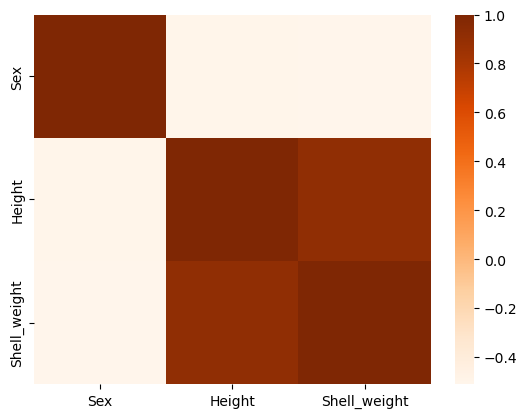

In [68]:
# feature들 간의 상관관게 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [69]:
# feature들 간의 상관관게 출력
features.corr()

,Sex,Height,Shell_weight
Sex,1.000000,-0.499399,-0.511198
Height,-0.499399,1.000000,0.911689
Shell_weight,-0.511198,0.911689,1.000000


#### 상관관계 시각화 결과
- Height과 Shell_weight 사이의 상관관계가 매우 높음
- 다음 사이클에서 Target과의 상관관계가 상대적으로 낮은 Height를 제거해볼 것

### 선형 회귀 모델로 학습

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = third_a_df.iloc[:, :-1], third_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [72]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.5833, RMSE: 1.6073, MSLE: 0.0208, RMSLE: 0.1443, R2: 0.4389


#### 선형 회귀 모델 학습 결과
- 2nd Cycle에 비해 R2 Score가 더욱 감소하고, 편차도 증가함

### 다항 회귀 모델로 학습

In [73]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 회귀: degree는 차수를 의미함
poly_features = PolynomialFeatures(degree=5).fit_transform(features)
poly_features

array([[1.00000000e+00, 2.00000000e+00, 9.00000000e-02, ...,
        5.90490000e-06, 5.90490000e-06, 5.90490000e-06],
       [1.00000000e+00, 2.00000000e+00, 1.40000000e-01, ...,
        1.03253270e-04, 1.28329065e-04, 1.59494695e-04],
       [1.00000000e+00, 2.00000000e+00, 9.50000000e-02, ...,
        1.99854225e-06, 1.27275586e-06, 8.10544519e-07],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.25000000e-01, ...,
        8.59120645e-05, 1.21307835e-04, 1.71286663e-04],
       [1.00000000e+00, 1.00000000e+00, 1.65000000e-01, ...,
        4.20306329e-04, 6.34280460e-04, 9.57186876e-04],
       [1.00000000e+00, 1.00000000e+00, 1.50000000e-01, ...,
        5.83522560e-04, 1.15148452e-03, 2.27226278e-03]])

In [74]:
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [75]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.4532, RMSE: 1.5663, MSLE: 0.0197, RMSLE: 0.1403, R2: 0.4672


#### 다항 회귀 모델 학습 결과
- 2nd Cycle 때와 결과가 거의 동일하며, 이에 따라 회귀선의 차수가 5일 때 가장 높은 평가를 기록함
- 학습 결과로 미루어 보아, 전처리 과정에 아직 문제가 있다고 볼 수 있음

### 각종 회귀 모델로 학습

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = third_a_df.iloc[:, :-1], third_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀모델 선언
# 주의: poly랑 병행하지 말 것
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 반복문으로 fit하기 위해 list 안에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.7044, RMSE: 1.6445, MSLE: 0.0221, RMSLE: 0.1485, R2: 0.4126
RandomForestRegressor
MSE: 2.5158, RMSE: 1.5861, MSLE: 0.0205, RMSLE: 0.1433, R2: 0.4536
GradientBoostingRegressor
MSE: 2.3793, RMSE: 1.5425, MSLE: 0.0191, RMSLE: 0.1383, R2: 0.4832
XGBRegressor
MSE: 2.3509, RMSE: 1.5332, MSLE: 0.0190, RMSLE: 0.1377, R2: 0.4894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 53810, number of used features: 3
[LightGBM] [Info] Start training from score 9.408883
LGBMRegressor
MSE: 2.2971, RMSE: 1.5156, MSLE: 0.0185, RMSLE: 0.1362, R2: 0.5011


#### 각종 회귀 모델 학습 결과
- 전반적으로 2nd Cycle과 학습 결과가 거의 동일함

### Random Forest 회귀 모델로 교차 검증

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = third_a_df.iloc[:, :-1], third_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [16, 18, 20],
              'min_samples_split': [100, 200, 300],
              'n_estimators': [10, 30, 50]}

kfold = KFold(n_splits=3, random_state=124, shuffle=True)

# scoring='neg_mean_squared_error': MSE가 낮은 순으로 평가
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)

# cv에 시드값이 고정된 KFold 객체를 전달
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [16, 18, 20],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [78]:
# 각 하이퍼 파라미터 조합 별 평가 점수를 데이터프레임 형식으로 만들어 출력
rfr_result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfr_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.324841,18
1,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.318036,10
2,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.316456,3
3,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.324481,17
4,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.319066,12
5,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.318263,11
6,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.333467,27
7,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.329352,24
8,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.328518,23
9,"{'max_depth': 18, 'min_samples_split': 100, 'n...",-2.324022,16


In [79]:
# 가장 높은 평가 점수를 받은 하이퍼 파라미터 조합들 출력
for params in rfr_result_df[rfr_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 20, 'min_samples_split': 100, 'n_estimators': 50}


#### Random Forest 회귀 모델 교차 검증 결과
- max_depth가 20, min_samples_split이 100, n_estimators가 50일 때 가장 좋은 평가 점수를 기록함

### Random Forest 회귀 모델 하이퍼 파라미터 튜닝 후 학습

In [80]:
# 최적의 하이퍼 파라미터로 튜닝
features, targets = third_a_df.iloc[:, :-1], third_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124, max_depth=20, min_samples_split=100, n_estimators=50)

rf_r.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=50,
                      random_state=124)

In [81]:
# 테스트 데이터 예측 후 평가
prediction = rf_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.2892, RMSE: 1.5130, MSLE: 0.0185, RMSLE: 0.1362, R2: 0.5028


#### 하이퍼 파라미터 튜닝 결과
- 전반적으로 2nd Cycle과 결과가 거의 동일함

### 3rd Cycle
- OLS와 VIF Score를 제외한 나머지 모델의 평가가 2nd Cycle과 거의 동일함
- Height와 Shell_weight 사이의 상관관계가 여전히 높기 때문에,  
  target과의 상관관계가 상대적으로 낮은 Height을 제거해보고 다시 학습

### 4th Cycle - 데이터 전처리
- 3rd Cycle 때의 데이터 세트에서 Height만 제거

In [82]:
# third_a_df에서 Height만 제거한 새로운 데이터 세트 생성
fourth_a_df = third_a_df.drop(labels=['Height'], axis=1)
fourth_a_df

,Sex,Shell_weight,Rings
0,2,0.0900,7
1,2,0.1740,9
2,2,0.0605,8
3,2,0.0850,7
4,2,0.1235,8
...,...,...,...
67258,1,0.3000,11
67259,1,0.2845,11
67260,1,0.1765,8
67261,1,0.2490,11


### OLS 평가

In [83]:
from statsmodels.api import OLS

features, targets = fourth_a_df.iloc[:, :-1], fourth_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          4.626e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        15:51:01   Log-Likelihood:                     -1.5739e+05
No. Observations:               67263   AIC:                                  3.148e+05
Df Residuals:                   67261   BIC:                                  3.148e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#### OLS 출력 결과
- 3rd Cycle에 비해 R2 점수가 약간 감소함
- 껍데기 무게와 성별에 부여된 가중치의 차이가 매우 큰 것을 볼 수 있음

### VIF Score 출력

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [85]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,1.474283,Sex
1,1.474283,Shell_weight


#### VIF Score 출력 결과
- 두 feature 모두 VIF Score에 이상이 발견되지 않음

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# target과 feature들 사이의 상관관계 출력
fourth_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Shell_weight    0.652681
Sex            -0.417999
Name: Rings, dtype: float64

<Axes: >

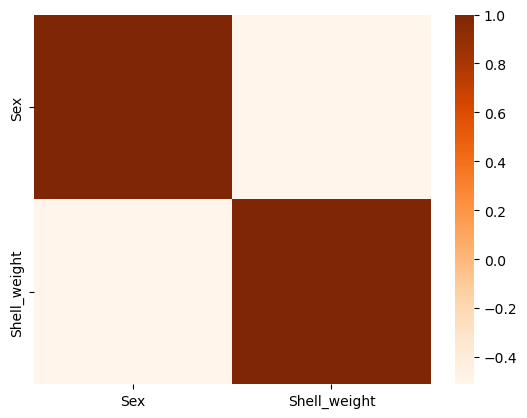

In [87]:
# feature들 간의 상관관게 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [88]:
# feature들 간의 상관관게 출력
features.corr()

,Sex,Shell_weight
Sex,1.000000,-0.511198
Shell_weight,-0.511198,1.000000


#### 상관관계 시각화 결과
- 두 feature 사이에 다소 높은 음의 상관관계가 존재함

### 선형 회귀 모델로 학습

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = fourth_a_df.iloc[:, :-1], fourth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [90]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [91]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.6001, RMSE: 1.6125, MSLE: 0.0211, RMSLE: 0.1452, R2: 0.4352


#### 선형 회귀 모델 학습 결과
- 3rd Cycle에 비해 R2 Score가 약간 감소하고, 편차도 증가함

### 다항 회귀 모델로 학습

In [92]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 회귀: degree는 차수를 의미함
poly_features = PolynomialFeatures(degree=6).fit_transform(features)
poly_features

array([[1.00000000e+00, 2.00000000e+00, 9.00000000e-02, ...,
        2.62440000e-04, 1.18098000e-05, 5.31441000e-07],
       [1.00000000e+00, 2.00000000e+00, 1.74000000e-01, ...,
        3.66654470e-03, 3.18989389e-04, 2.77520769e-05],
       [1.00000000e+00, 2.00000000e+00, 6.05000000e-02, ...,
        5.35897202e-05, 1.62108904e-06, 4.90379434e-08],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.76500000e-01, ...,
        9.70462680e-04, 1.71286663e-04, 3.02320960e-05],
       [1.00000000e+00, 1.00000000e+00, 2.49000000e-01, ...,
        3.84412400e-03, 9.57186876e-04, 2.38339532e-04],
       [1.00000000e+00, 1.00000000e+00, 2.96000000e-01, ...,
        7.67656346e-03, 2.27226278e-03, 6.72589784e-04]])

In [93]:
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [94]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.4727, RMSE: 1.5725, MSLE: 0.0198, RMSLE: 0.1407, R2: 0.4629


#### 다항 회귀 모델 학습 결과
- 회귀선의 차수가 6일 때 가장 높은 평가를 기록함
- 이에 따라 3rd Cycle에 비해 비선형의 성격이 강해졌다고 볼 수 있음

### 각종 회귀 모델로 학습

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = fourth_a_df.iloc[:, :-1], fourth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀모델 선언
# 주의: poly랑 병행하지 말 것
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 반복문으로 fit하기 위해 list 안에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.3336, RMSE: 1.5276, MSLE: 0.0190, RMSLE: 0.1378, R2: 0.4931
RandomForestRegressor
MSE: 2.3149, RMSE: 1.5215, MSLE: 0.0188, RMSLE: 0.1372, R2: 0.4972
GradientBoostingRegressor
MSE: 2.3804, RMSE: 1.5428, MSLE: 0.0191, RMSLE: 0.1384, R2: 0.4830
XGBRegressor
MSE: 2.3442, RMSE: 1.5311, MSLE: 0.0189, RMSLE: 0.1376, R2: 0.4908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 53810, number of used features: 2
[LightGBM] [Info] Start training from score 9.408883
LGBMRegressor
MSE: 2.3039, RMSE: 1.5179, MSLE: 0.0186, RMSLE: 0.1364, R2: 0.4996


#### 각종 회귀 모델 학습 결과
- 전반적으로 3rd Cycle에 비해 모델의 평가가 감소함

### Random Forest 회귀 모델로 교차 검증

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = fourth_a_df.iloc[:, :-1], fourth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [16, 18, 20],
              'min_samples_split': [100, 200, 300],
              'n_estimators': [10, 30, 50]}

kfold = KFold(n_splits=3, random_state=124, shuffle=True)

# scoring='neg_mean_squared_error': MSE가 낮은 순으로 평가
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)

# cv에 시드값이 고정된 KFold 객체를 전달
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [16, 18, 20],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [97]:
# 각 하이퍼 파라미터 조합 별 평가 점수를 데이터프레임 형식으로 만들어 출력
rfr_result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfr_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.324016,14
1,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.321146,6
2,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.320257,1
3,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.326255,18
4,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.323001,12
5,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.322318,10
6,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.331308,27
7,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.328754,24
8,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.328737,23
9,"{'max_depth': 18, 'min_samples_split': 100, 'n...",-2.323906,13


In [98]:
# 가장 높은 평가 점수를 받은 하이퍼 파라미터 조합들 출력
for params in rfr_result_df[rfr_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 16, 'min_samples_split': 100, 'n_estimators': 50}


#### Random Forest 회귀 모델 교차 검증 결과
- max_depth가 16, min_samples_split이 100, n_estimators가 50일 때 가장 좋은 평가 점수를 기록함

### Random Forest 회귀 모델 하이퍼 파라미터 튜닝 후 학습

In [99]:
# 최적의 하이퍼 파라미터로 튜닝
features, targets = fourth_a_df.iloc[:, :-1], fourth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124, max_depth=16, min_samples_split=100, n_estimators=50)

rf_r.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, min_samples_split=100, n_estimators=50,
                      random_state=124)

In [100]:
# 테스트 데이터 예측 후 평가
prediction = rf_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.2843, RMSE: 1.5114, MSLE: 0.0185, RMSLE: 0.1360, R2: 0.5038


#### 하이퍼 파라미터 튜닝 결과
- 튜닝 이전 Random Forest는 3rd Cycle보다 낮은 평가를 기록했지만,  
  튜닝 이후에는 반대로 3rd Cycle보다 높은 평가를 기록함

### 4th Cycle
- 전반적으로 이전 사이클에 비해 낮은 평가를 기록함
- 다음 사이클에서는 Height 대신 Shell_weight를 제거하고 비교

### 5th Cycle - 데이터 전처리
- 3rd Cycle 때의 데이터 세트에서 Shell_weight만 제거

In [101]:
# third_a_df에서 Height만 제거한 새로운 데이터 세트 생성
fifth_a_df = third_a_df.drop(labels=['Shell_weight'], axis=1)
fifth_a_df

,Sex,Height,Rings
0,2,0.090,7
1,2,0.140,9
2,2,0.095,8
3,2,0.090,7
4,2,0.125,8
...,...,...,...
67258,1,0.165,11
67259,1,0.170,11
67260,1,0.125,8
67261,1,0.165,11


### OLS 평가

In [102]:
from statsmodels.api import OLS

features, targets = fifth_a_df.iloc[:, :-1], fifth_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          9.412e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        15:51:47   Log-Likelihood:                     -1.3468e+05
No. Observations:               67263   AIC:                                  2.694e+05
Df Residuals:                   67261   BIC:                                  2.694e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### OLS 출력 결과
- 4th Cycle에 비해 R2 점수가 약간 증가함
- 단, 두 feature의 가중치 차이는 더욱 커진 것을 볼 수 있음

### VIF Score 출력

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [104]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,1.908796,Sex
1,1.908796,Height


#### VIF Score 출력 결과
- 두 feature 모두 VIF Score에 이상이 발견되지 않음

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# target과 feature들 사이의 상관관계 출력
fifth_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Height    0.624410
Sex      -0.417999
Name: Rings, dtype: float64

<Axes: >

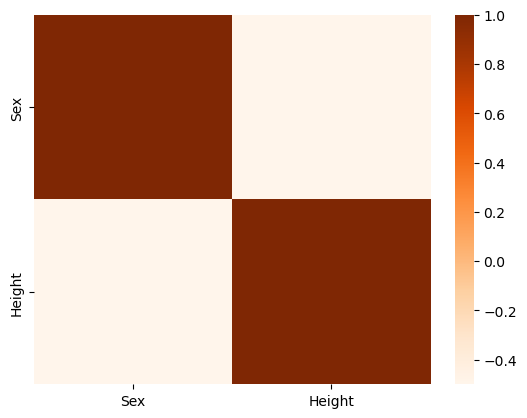

In [106]:
# feature들 간의 상관관게 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [107]:
# feature들 간의 상관관게 출력
features.corr()

,Sex,Height
Sex,1.000000,-0.499399
Height,-0.499399,1.000000


#### 상관관계 시각화 결과
- 두 feature 사이에 다소 높은 음의 상관관계가 존재함
- 단, 상관관계 정도는 4th Cycle에 비해 약간 감소함

### 선형 회귀 모델로 학습

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = fifth_a_df.iloc[:, :-1], fifth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [109]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [110]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.7460, RMSE: 1.6571, MSLE: 0.0223, RMSLE: 0.1492, R2: 0.4036


#### 선형 회귀 모델 학습 결과
- 4th Cycle에 비해 R2 Score가 감소함

### 다항 회귀 모델로 학습

In [111]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 회귀: degree는 차수를 의미함
poly_features = PolynomialFeatures(degree=6).fit_transform(features)
poly_features

array([[1.00000000e+00, 2.00000000e+00, 9.00000000e-02, ...,
        2.62440000e-04, 1.18098000e-05, 5.31441000e-07],
       [1.00000000e+00, 2.00000000e+00, 1.40000000e-01, ...,
        1.53664000e-03, 1.07564800e-04, 7.52953600e-06],
       [1.00000000e+00, 2.00000000e+00, 9.50000000e-02, ...,
        3.25802500e-04, 1.54756188e-05, 7.35091891e-07],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.25000000e-01, ...,
        2.44140625e-04, 3.05175781e-05, 3.81469727e-06],
       [1.00000000e+00, 1.00000000e+00, 1.65000000e-01, ...,
        7.41200625e-04, 1.22298103e-04, 2.01791870e-05],
       [1.00000000e+00, 1.00000000e+00, 1.50000000e-01, ...,
        5.06250000e-04, 7.59375000e-05, 1.13906250e-05]])

In [112]:
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [113]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.6408, RMSE: 1.6251, MSLE: 0.0214, RMSLE: 0.1462, R2: 0.4264


#### 다항 회귀 모델 학습 결과
- 회귀선의 차수가 6일 때 가장 높은 평가를 기록함
- 다만, 전반적인 평가는 4th Cycle에 비해 낮은 양상을 보임

### 각종 회귀 모델로 학습

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = fifth_a_df.iloc[:, :-1], fifth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀모델 선언
# 주의: poly랑 병행하지 말 것
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 반복문으로 fit하기 위해 list 안에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 2.6297, RMSE: 1.6216, MSLE: 0.0213, RMSLE: 0.1460, R2: 0.4288
RandomForestRegressor
MSE: 2.6297, RMSE: 1.6216, MSLE: 0.0213, RMSLE: 0.1460, R2: 0.4288
GradientBoostingRegressor
MSE: 2.6296, RMSE: 1.6216, MSLE: 0.0213, RMSLE: 0.1460, R2: 0.4288
XGBRegressor
MSE: 2.6296, RMSE: 1.6216, MSLE: 0.0213, RMSLE: 0.1460, R2: 0.4288
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 53810, number of used features: 2
[LightGBM] [Info] Start training from score 9.408883
LGBMRegressor
MSE: 2.6291, RMSE: 1.6215, MSLE: 0.0213, RMSLE: 0.1459, R2: 0.4289


#### 각종 회귀 모델 학습 결과
- 학습에 사용한 모델들의 평가가 거의 동일하게 측정됨

### Random Forest 회귀 모델로 교차 검증

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = fifth_a_df.iloc[:, :-1], fifth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [16, 18, 20],
              'min_samples_split': [100, 200, 300],
              'n_estimators': [10, 30, 50]}

kfold = KFold(n_splits=3, random_state=124, shuffle=True)

# scoring='neg_mean_squared_error': MSE가 낮은 순으로 평가
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)

# cv에 시드값이 고정된 KFold 객체를 전달
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [16, 18, 20],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [116]:
# 각 하이퍼 파라미터 조합 별 평가 점수를 데이터프레임 형식으로 만들어 출력
rfr_result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfr_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.631232,22
1,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.631116,19
2,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-2.631273,25
3,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.630797,4
4,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.630805,7
5,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-2.630918,16
6,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.630896,13
7,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.630731,1
8,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-2.630821,10
9,"{'max_depth': 18, 'min_samples_split': 100, 'n...",-2.631232,22


In [117]:
# 가장 높은 평가 점수를 받은 하이퍼 파라미터 조합들 출력
for params in rfr_result_df[rfr_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 16, 'min_samples_split': 300, 'n_estimators': 30}
{'max_depth': 18, 'min_samples_split': 300, 'n_estimators': 30}
{'max_depth': 20, 'min_samples_split': 300, 'n_estimators': 30}


#### Random Forest 회귀 모델 교차 검증 결과
- max_depth가 16, min_samples_split이 100, n_estimators가 50일 때 가장 좋은 평가 점수를 기록함

### Random Forest 회귀 모델 하이퍼 파라미터 튜닝 후 학습

In [118]:
# 최적의 하이퍼 파라미터로 튜닝
features, targets = fifth_a_df.iloc[:, :-1], fifth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124, max_depth=16, min_samples_split=100, n_estimators=50)

rf_r.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, min_samples_split=100, n_estimators=50,
                      random_state=124)

In [119]:
# 테스트 데이터 예측 후 평가
prediction = rf_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.6294, RMSE: 1.6215, MSLE: 0.0213, RMSLE: 0.1459, R2: 0.4289


#### 하이퍼 파라미터 튜닝 결과
- 튜닝 이전과 평가 점수 차이가 거의 없으며, 4th Cycle에 비해 낮은 평가를 기록함

### 5th Cycle
- 전반적으로 이전 사이클에 비해 낮은 평가를 기록함
- 2nd Cycle로 넘어갈 때 제거한 feature들 중 평가에 중요한 feature가 있었을 것으로 추정
- 제거할 feature를 다시 선정할 필요가 있음

In [120]:
# 기본 전처리된 데이터 세트 다시 확인
pre_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,I,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,I,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,I,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,I,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
67258,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


### 6th Cycle - 데이터 전처리
- 위 상태에서 LabelEncoder()로 성별 feature 레이블 인코딩
- 각 feature간 상관관계를 시각화한 다음, 성별과의 상관관계가 가장 낮은 feature 하나만 남겨서 평가
- pairplot으로 feature 사이에 다중 공선성이 발생했는지도 조사해볼 것

In [121]:
# pre_a_df 복사
sixth_a_df = pre_a_df.copy()
sixth_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,I,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,I,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,I,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,I,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
67258,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [122]:
from sklearn.preprocessing import LabelEncoder

# 성별에 레이블 인코더 적용
label_encoder = LabelEncoder()
result = label_encoder.fit_transform(sixth_a_df['Sex'])
print(result)
print(label_encoder.classes_)
sixth_a_df['Sex'] = result

[1 1 1 ... 0 0 0]
['F' 'I' 'M']


In [123]:
# 레이블 인코딩 적용 확인
sixth_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,1,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,1,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,1,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,1,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
67258,0,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,0,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,0,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [124]:
# target과의 상관관계 출력
sixth_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Shell_weight      0.652681
Height            0.624410
Diameter          0.597412
Length            0.582424
Whole_weight      0.582056
Viscera_weight    0.565577
Shucked_weight    0.482898
Sex              -0.044472
Name: Rings, dtype: float64

<Axes: >

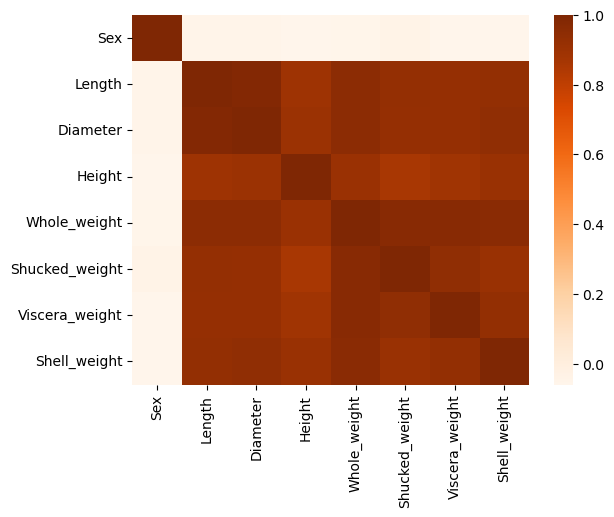

In [125]:
# feature들 간의 상관관게 시각화
sns.heatmap(sixth_a_df.iloc[:, :-1].corr(), cmap='Oranges')

In [126]:
# feature들 간의 상관관게 출력
sixth_a_df.iloc[:, :-1].corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Sex,1.000000,-0.048571,-0.050085,-0.057339,-0.053000,-0.041726,-0.059509,-0.059966
Length,-0.048571,1.000000,0.984782,0.896315,0.952230,0.928915,0.924369,0.931332
Diameter,-0.050085,0.984782,1.000000,0.901407,0.953004,0.925325,0.924597,0.938048
Height,-0.057339,0.896315,0.901407,1.000000,0.905960,0.861266,0.886175,0.911689
Whole_weight,-0.053000,0.952230,0.953004,0.905960,1.000000,0.970706,0.969812,0.962628
Shucked_weight,-0.041726,0.928915,0.925325,0.861266,0.970706,1.000000,0.938986,0.909403
Viscera_weight,-0.059509,0.924369,0.924597,0.886175,0.969812,0.938986,1.000000,0.932641
Shell_weight,-0.059966,0.931332,0.938048,0.911689,0.962628,0.909403,0.932641,1.000000


In [127]:
# 성별과 다른 feature들 간의 상관관게 출력
sixth_a_df.iloc[:, :-1].corr()['Sex'].sort_values(ascending=False)[1:]

Shucked_weight   -0.041726
Length           -0.048571
Diameter         -0.050085
Whole_weight     -0.053000
Height           -0.057339
Viscera_weight   -0.059509
Shell_weight     -0.059966
Name: Sex, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

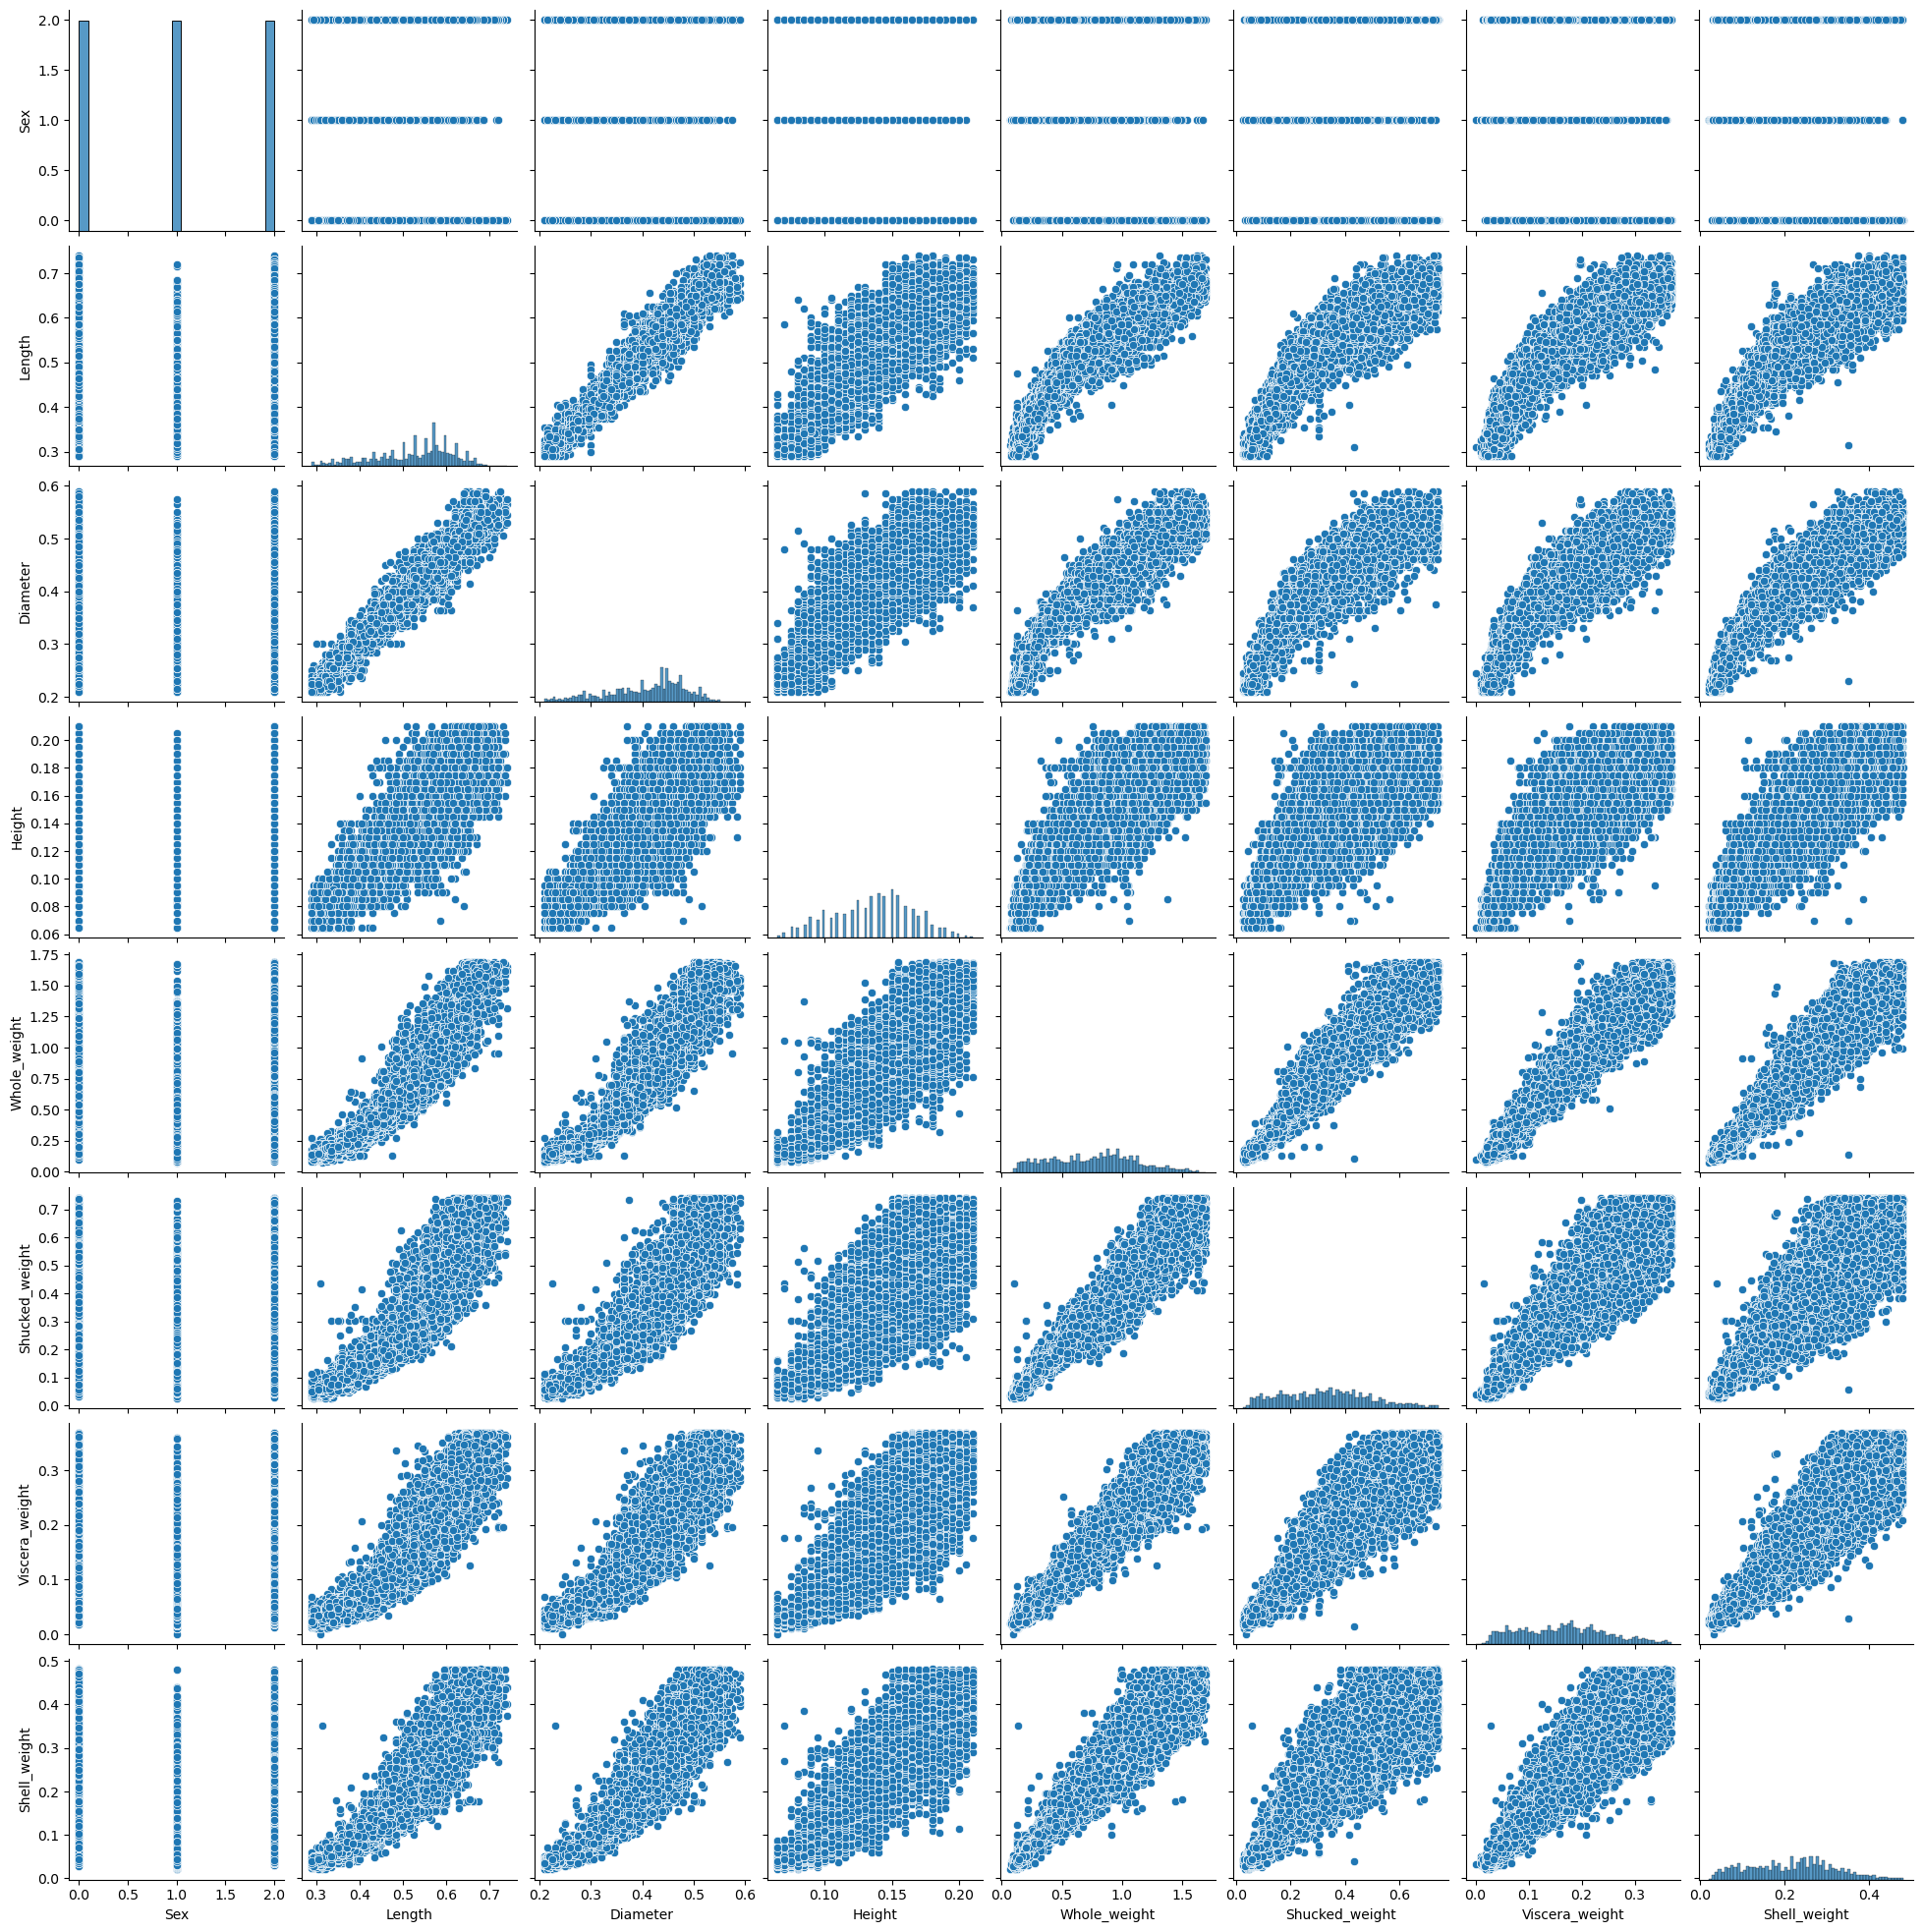

In [128]:
# pairplot으로 다중 공선성 여부 검사
sns.pairplot(sixth_a_df.iloc[:, :-1])
plt.show()

#### 중간 분석
- 현재 성별과 다른 컬럼들(target 포함) 사이의 상관관계는 거의 없으며,  
  나머지 feature들은 서로 간에 매우 높은 상관관계가 관측됨
- 또한 성별을 제욓한 나머지 feature들에서 다중 공선성이 관측됨

### OLS 평가

In [129]:
from statsmodels.api import OLS

features, targets = sixth_a_df.iloc[:, :-1], sixth_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          3.358e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        15:52:28   Log-Likelihood:                     -1.2307e+05
No. Observations:               67263   AIC:                                  2.462e+05
Df Residuals:                   67255   BIC:                                  2.462e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### OLS 출력 결과
- R2 Score와 Watson Score는 이상적인 수치를 보임
- 단, feature들 사이의 가중치 차이가 매우 크게 나타남

### VIF Score 출력

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [131]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,2.491970,Sex
1,1021.645630,Length
2,1093.968592,Diameter
3,138.559112,Height
4,367.416300,Whole_weight
5,105.829935,Shucked_weight
6,86.168424,Viscera_weight
7,97.883995,Shell_weight


#### VIF Score 출력 결과
- 성별을 제외한 나머지 feature들의 VIF Score가 비정상적으로 높음

### 선형 회귀 모델로 학습

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = sixth_a_df.iloc[:, :-1], sixth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [133]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [134]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.2018, RMSE: 1.4838, MSLE: 0.0182, RMSLE: 0.1349, R2: 0.5218


#### 선형 회귀 모델 학습 결과
- 5th Cycle에 비해 R2 Score가 향상되었으며, 오차는 감소한 현상을 보임

### 다항 회귀 모델로 학습

In [135]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 회귀: degree는 차수를 의미함
poly_features = PolynomialFeatures(degree=4).fit_transform(features)
poly_features

array([[1.00000000e+00, 1.00000000e+00, 4.05000000e-01, ...,
        3.01401000e-05, 4.44690000e-05, 6.56100000e-05],
       [1.00000000e+00, 1.00000000e+00, 5.20000000e-01, ...,
        5.51780100e-04, 7.11183240e-04, 9.16636176e-04],
       [1.00000000e+00, 1.00000000e+00, 3.75000000e-01, ...,
        1.21017016e-05, 1.27330947e-05, 1.33974301e-05],
       ...,
       [1.00000000e+00, 0.00000000e+00, 5.15000000e-01, ...,
        4.71302390e-04, 6.76299771e-04, 9.70462680e-04],
       [1.00000000e+00, 0.00000000e+00, 5.65000000e-01, ...,
        3.54155912e-03, 3.68974151e-03, 3.84412400e-03],
       [1.00000000e+00, 0.00000000e+00, 6.25000000e-01, ...,
        5.96848954e-03, 6.76886170e-03, 7.67656346e-03]])

In [136]:
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [137]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.9385, RMSE: 1.3923, MSLE: 0.0160, RMSLE: 0.1267, R2: 0.5789


#### 다항 회귀 모델 학습 결과
- 회귀선의 차수가 4일 때 가장 높은 평가를 기록함

### 각종 회귀 모델로 학습

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = sixth_a_df.iloc[:, :-1], sixth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀모델 선언
# 주의: poly랑 병행하지 말 것
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 반복문으로 fit하기 위해 list 안에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 3.8696, RMSE: 1.9671, MSLE: 0.0320, RMSLE: 0.1788, R2: 0.1595
RandomForestRegressor
MSE: 1.9579, RMSE: 1.3993, MSLE: 0.0165, RMSLE: 0.1283, R2: 0.5747
GradientBoostingRegressor
MSE: 1.9218, RMSE: 1.3863, MSLE: 0.0159, RMSLE: 0.1260, R2: 0.5826
XGBRegressor
MSE: 1.8942, RMSE: 1.3763, MSLE: 0.0158, RMSLE: 0.1255, R2: 0.5886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 53810, number of used features: 8
[LightGBM] [Info] Start training from score 9.408883
LGBMRegressor
MSE: 1.8675, RMSE: 1.3666, MSLE: 0.0155, RMSLE: 0.1245, R2: 0.5944


#### 각종 회귀 모델 학습 결과
- 전반적으로 비슷한 전처리를 거친 1st Cycle과 비슷한 결과를 보임
> - 1st Cycle과의 차이점은 성별 feature의 인코딩 방식
>> 원핫 인코딩(1st) vs 레이블 인코딩(6th)

### Random Forest 회귀 모델로 교차 검증

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = sixth_a_df.iloc[:, :-1], sixth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [16, 18, 20],
              'min_samples_split': [100, 200, 300],
              'n_estimators': [10, 30, 50]}

kfold = KFold(n_splits=3, random_state=124, shuffle=True)

# scoring='neg_mean_squared_error': MSE가 낮은 순으로 평가
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)

# cv에 시드값이 고정된 KFold 객체를 전달
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [16, 18, 20],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [10, 30, 50]},
             scoring='neg_mean_squared_error')

In [140]:
# 각 하이퍼 파라미터 조합 별 평가 점수를 데이터프레임 형식으로 만들어 출력
rfr_result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfr_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-1.948344,13
1,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-1.928096,6
2,"{'max_depth': 16, 'min_samples_split': 100, 'n...",-1.925023,3
3,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-1.955635,18
4,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-1.942588,12
5,"{'max_depth': 16, 'min_samples_split': 200, 'n...",-1.940256,9
6,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-1.969361,27
7,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-1.960117,24
8,"{'max_depth': 16, 'min_samples_split': 300, 'n...",-1.959379,21
9,"{'max_depth': 18, 'min_samples_split': 100, 'n...",-1.948622,14


In [141]:
# 가장 높은 평가 점수를 받은 하이퍼 파라미터 조합들 출력
for params in rfr_result_df[rfr_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 20, 'min_samples_split': 100, 'n_estimators': 50}


#### Random Forest 회귀 모델 교차 검증 결과
- max_depth가 20, min_samples_split이 100, n_estimators가 50일 때 가장 좋은 평가 점수를 기록함

### Random Forest 회귀 모델 하이퍼 파라미터 튜닝 후 학습

In [142]:
# 최적의 하이퍼 파라미터로 튜닝
features, targets = sixth_a_df.iloc[:, :-1], sixth_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124, max_depth=20, min_samples_split=100, n_estimators=50)

rf_r.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=50,
                      random_state=124)

In [143]:
# 테스트 데이터 예측 후 평가
prediction = rf_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.8852, RMSE: 1.3730, MSLE: 0.0157, RMSLE: 0.1253, R2: 0.5905


#### 하이퍼 파라미터 튜닝 결과
- 튜닝 이전에 비해 평가가 약간 나아짐
- 다만, feature들 사이에 다중 공선성이 발생했기 때문에 이 지표를 신뢰할 수 있는지는 다시 생각할 필요가 있음

### 6th Cycle
- 성별을 제외한 나머지 feature들 간 다중 공선성이 발생함
- 다음 Cycle에서는 성별과의 연관성이 가장 낮은 Shucked_weight를 제외한 나머지 feature를 제거하고 실행

### 7th Cycle - 데이터 전처리
- 6th Cycle 때의 데이터 세트에서 성별과 살 무게만 유지하고 평가

In [144]:
# sixth_a_df에서 성별과 살 무게, target만 남은 새로운 데이터 세트 생성
seventh_a_df = sixth_a_df.loc[:, ['Sex', 'Shucked_weight', 'Rings']]
seventh_a_df

,Sex,Shucked_weight,Rings
0,1,0.1355,7
1,1,0.2375,9
2,1,0.0960,8
3,1,0.1375,7
4,1,0.1630,8
...,...,...,...
67258,0,0.4580,11
67259,0,0.4255,11
67260,0,0.2865,8
67261,0,0.3700,11


### OLS 평가

In [145]:
from statsmodels.api import OLS

features, targets = seventh_a_df.iloc[:, :-1], seventh_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                          2.386e+05
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        15:57:07   Log-Likelihood:                     -1.7759e+05
No. Observations:               67263   AIC:                                  3.552e+05
Df Residuals:                   67261   BIC:                                  3.552e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### OLS 출력 결과
- 두 feature 사이의 가중치 차이가 큼

### VIF Score 출력

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature 별 VIF Score를 출력해주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [147]:
# feature 별 VIF Score 출력
get_vif(features)

,vif_score,feature
0,1.873884,Sex
1,1.873884,Shucked_weight


#### VIF Score 출력 결과
- 두 feature 모두 VIF Score에 이상이 발견되지 않음

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# target과 feature들 사이의 상관관계 출력
seventh_a_df.corr()['Rings'].sort_values(ascending=False)[1:]

Shucked_weight    0.482898
Sex              -0.044472
Name: Rings, dtype: float64

<Axes: >

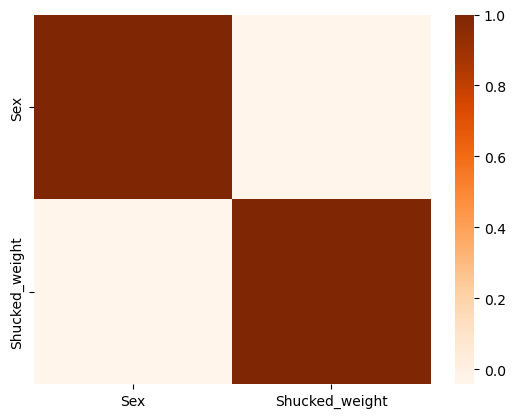

In [149]:
# feature들 간의 상관관게 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [150]:
# feature들 간의 상관관게 출력
features.corr()

,Sex,Shucked_weight
Sex,1.000000,-0.041726
Shucked_weight,-0.041726,1.000000


### 선형 회귀 모델로 학습

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = seventh_a_df.iloc[:, :-1], seventh_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [152]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [153]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 3.5201, RMSE: 1.8762, MSLE: 0.0296, RMSLE: 0.1721, R2: 0.2354


#### 선형 회귀 모델 학습 결과
- 이전 사이클에 비해 R2가 매우 감소함

### 7th Cycle
- 강사님 조언을 듣고 난 뒤, 실습의 진행 방향이 다소 잘못되었다는 것을 느낌
- 다음에는 원본 데이터부터 선형 회귀모델에 fit 해보고,  
  다항 회귀나 OLS, VIF 등은 R2 Score를 올리는 목적으로 사용할 것
- 일단 R2 Score가 핵심!

### 8th Cycle 들어가기 전 점검
- 강사님 피드백 사항
> - 6th Cycle에서 얻은 각 feature에 각자의 가중치(coef)를 곱한 뒤, 그 값을 모두 합한 새로운 feature로 단변량 분석(피쳐 엔지니어링)
> - 성별: 데이터 세트를 성별에 따라 분리하고 각각의 OLS 구하기

- 이후 진행 방식
> 1. 무작정 OLS랑 VIF부터 출력하지 말고, 선형 회귀 모델 먼저 학습시키기
> 2. 선형 회귀 모델에서 만족할만한 R2가 나왔을 때만 다항 회귀나 OLS, VIF 등의 모델 및 지표 활용하고,  
만약 R2가 낮게 나왔다면 데이터 전처리부터 다시 해보기

In [154]:
# 6th Cycle에서 썼던 데이터 세트 확인
sixth_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,1,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,1,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,1,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,1,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
67258,0,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,0,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,0,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


#### 중간 점검
- 0: F(암컷)
- 1: I(유아)
- 2: M(수컷)

In [163]:
# 성별에 따라 데이터 세트 분리
female_a_df = sixth_a_df[sixth_a_df.Sex == 0]
infant_a_df = sixth_a_df[sixth_a_df.Sex == 1]
male_a_df = sixth_a_df[sixth_a_df.Sex == 2]

In [164]:
# 각 데이터 세트 확인
female_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
44842,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
44843,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
44844,0,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
44845,0,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
44846,0,0.595,0.475,0.145,0.9085,0.3605,0.1765,0.2650,15
...,...,...,...,...,...,...,...,...,...
67258,0,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
67259,0,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11
67260,0,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
67261,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [165]:
infant_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.405,0.300,0.090,0.3035,0.1355,0.0610,0.0900,7
1,1,0.520,0.400,0.140,0.5590,0.2375,0.1350,0.1740,9
2,1,0.375,0.280,0.095,0.2110,0.0960,0.0575,0.0605,8
3,1,0.405,0.310,0.090,0.2505,0.1375,0.0475,0.0850,7
4,1,0.445,0.335,0.125,0.3840,0.1630,0.0835,0.1235,8
...,...,...,...,...,...,...,...,...,...
22416,1,0.360,0.255,0.080,0.1765,0.0690,0.0335,0.0560,6
22417,1,0.335,0.230,0.075,0.1585,0.0615,0.0385,0.0450,5
22418,1,0.375,0.280,0.100,0.2775,0.1190,0.0475,0.0850,7
22419,1,0.515,0.400,0.120,0.7125,0.3055,0.1590,0.1750,8


In [166]:
male_a_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
22421,2,0.605,0.485,0.175,1.2705,0.4935,0.2615,0.3700,14
22422,2,0.615,0.480,0.150,1.1370,0.5525,0.2565,0.2930,9
22423,2,0.680,0.525,0.195,1.4840,0.5925,0.3115,0.3925,11
22424,2,0.575,0.465,0.195,1.1290,0.5090,0.2585,0.3500,15
22425,2,0.530,0.410,0.120,0.6330,0.2795,0.1365,0.1800,9
...,...,...,...,...,...,...,...,...,...
44837,2,0.480,0.375,0.120,0.6015,0.3120,0.1405,0.1350,8
44838,2,0.535,0.435,0.145,0.7715,0.3285,0.1575,0.2575,10
44839,2,0.575,0.450,0.145,0.9765,0.4745,0.2040,0.2750,13
44840,2,0.585,0.455,0.155,0.9570,0.3795,0.2375,0.3000,13


### 선형 회귀 모델로 학습

#### 암컷

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = female_a_df.iloc[:, :-1], female_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [168]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [169]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.5879, RMSE: 1.6087, MSLE: 0.0192, RMSLE: 0.1387, R2: 0.3096


#### 유아

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = infant_a_df.iloc[:, :-1], infant_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [171]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [172]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 1.2164, RMSE: 1.1029, MSLE: 0.0136, RMSLE: 0.1166, R2: 0.5465


#### 수컷

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = male_a_df.iloc[:, :-1], male_a_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [174]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [175]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 2.5261, RMSE: 1.5894, MSLE: 0.0194, RMSLE: 0.1391, R2: 0.3557


#### 선형 회귀 모델 학습 결과
- 유아기 전복의 데이터만 담긴 데이터 세트를 예측했을 때 R2가 약 0.54 정도로, 암컷, 수컷 전복의 예측률보다 높았음
- 다만 전반적인 R2가 낮게 측정되었기 때문에 피쳐 엔지니어링을 거친 후 지금의 결과와 비교 분석

### 피쳐 엔지니어링